# Geometric Operations and Other Mathematical Tools using OpenCV

### Faris D. Qadri

## Libraries and helper func

In [42]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [43]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"): # plotting image left-right
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

#  Geometric Transformations


## Scaling 


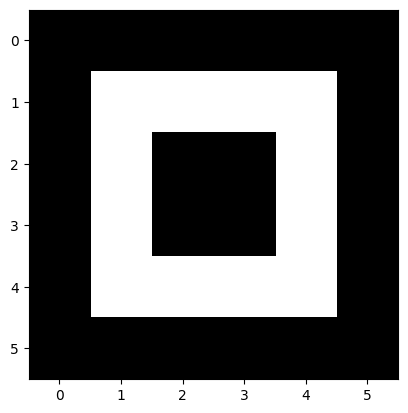

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [44]:
toy_image = np.zeros((6,6))
toy_image[1:5,1:5]=255
toy_image[2:4,2:4]=0
plt.imshow(toy_image,cmap='gray')
plt.show()
toy_image

We can rescale along a specific axis:

- `fx`: scale factor along the horizontal axis  
- `fy`: scale factor along the vertical axis


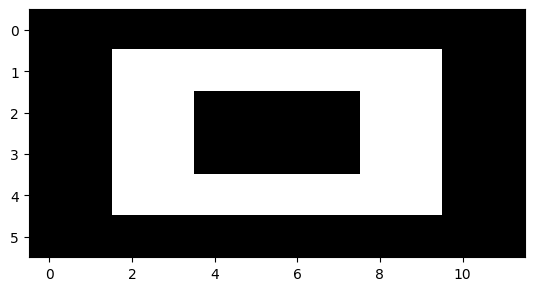

In [45]:
new_toy = cv2.resize(toy_image,None,fx=2, fy=1, interpolation = cv2.INTER_NEAREST )
plt.imshow(new_toy,cmap='gray')
plt.show()


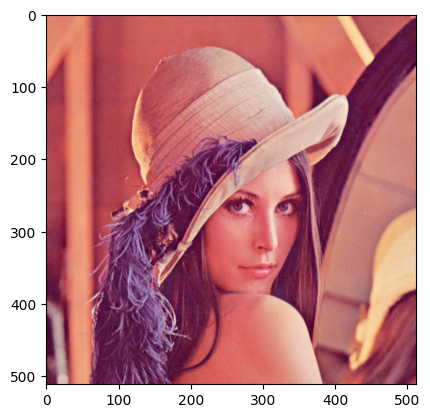

In [46]:
image = cv2.imread("lenna.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

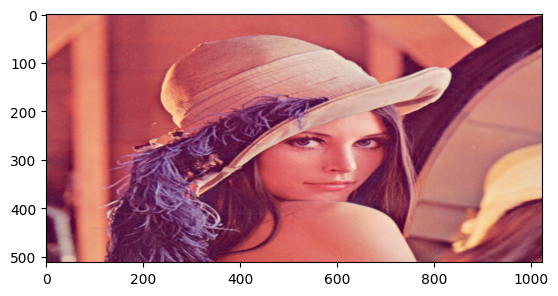

old image shape: (512, 512, 3) new image shape: (512, 1024, 3)


In [48]:
new_image = cv2.resize(image, None, fx=2, fy=1, interpolation=cv2.INTER_CUBIC) # streched right
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

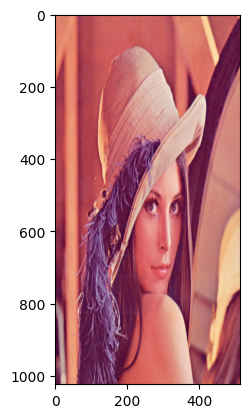

old image shape: (512, 512, 3) new image shape: (1024, 512, 3)


In [49]:
new_image = cv2.resize(image, None, fx=1, fy=2, interpolation=cv2.INTER_CUBIC) # streched bellow
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

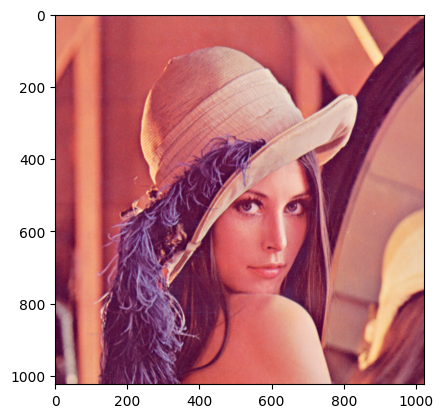

old image shape: (512, 512, 3) new image shape: (1024, 1024, 3)


In [50]:
new_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC) # double sized
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

We can also shrink the image by setting the scaling factor to a real number between 0 and 1:


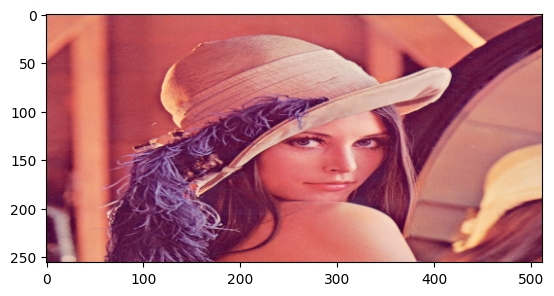

old image shape: (512, 512, 3) new image shape: (256, 512, 3)


In [52]:
new_image = cv2.resize(image, None, fx=1, fy=0.5, interpolation=cv2.INTER_CUBIC) # half sized
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

print("old image shape:", image.shape, "new image shape:", new_image.shape)

In [53]:
rows = 100
cols = 200

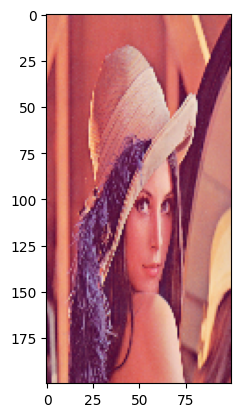

old image shape: (512, 512, 3) new image shape: (200, 100, 3)


In [55]:
new_image = cv2.resize(image, (100, 200), interpolation=cv2.INTER_CUBIC) # reshaped
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

## Translation


Translation is  when you  shift the location of the image.

In [56]:
tx = 100
ty = 0
M = np.float32([[1, 0, tx], [0, 1, ty]])
M

array([[  1.,   0., 100.],
       [  0.,   1.,   0.]], dtype=float32)

In [57]:
rows, cols, _ = image.shape # shape of image

In [58]:
new_image = cv2.warpAffine(image, M, (cols, rows))

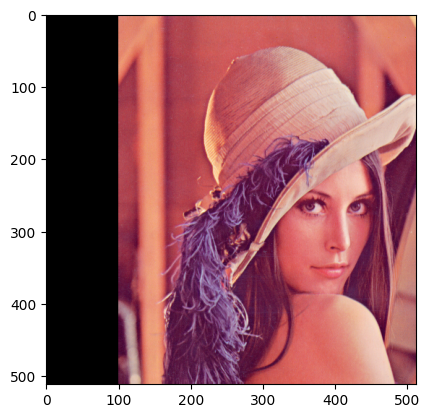

In [59]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

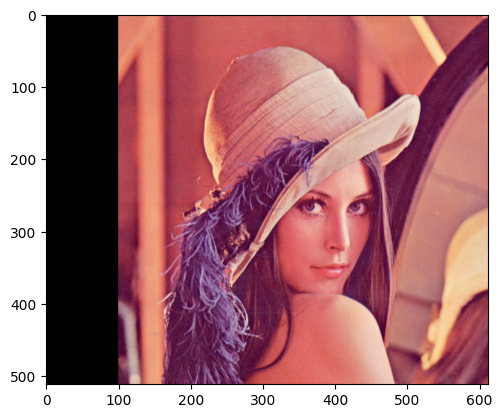

In [61]:
new_image = cv2.warpAffine(image, M, (cols + tx, rows + ty)) # vertical shifting
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

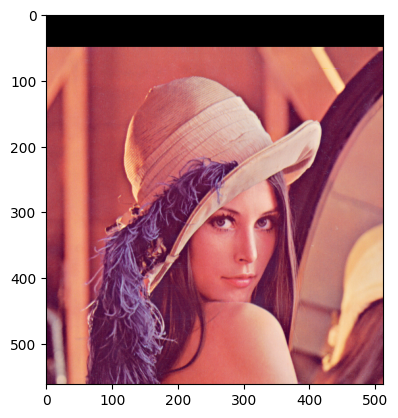

In [62]:
tx = 0
ty = 50
M = np.float32([[1, 0, tx], [0, 1, ty]])
new_iamge = cv2.warpAffine(image, M, (cols + tx, rows + ty)) # horizontal shifting
plt.imshow(cv2.cvtColor(new_iamge, cv2.COLOR_BGR2RGB))
plt.show()

## Rotation 


In [63]:
theta = 45.0
M = cv2.getRotationMatrix2D(center=(3, 3), angle=theta, scale=1) # rotate by degrees (theta)
new_toy_image = cv2.warpAffine(toy_image, M, (6, 6))

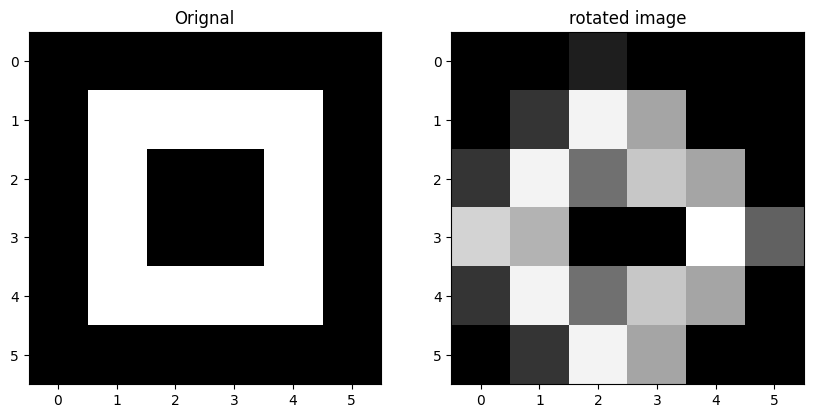

In [64]:
plot_image(toy_image, new_toy_image, title_1="Orignal", title_2="rotated image")

In [65]:
new_toy_image 

array([[  0.        ,   0.        ,  28.38867188,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [195.234375  , 165.10253906,   0.        ,   0.        ,
        234.82910156,  89.89746094],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ]])

In [66]:
cols, rows, _ = image.shape

In [67]:
M = cv2.getRotationMatrix2D(center=(cols // 2 - 1, rows // 2 - 1), angle=theta, scale=1)
new_image = cv2.warpAffine(image, M, (cols, rows))

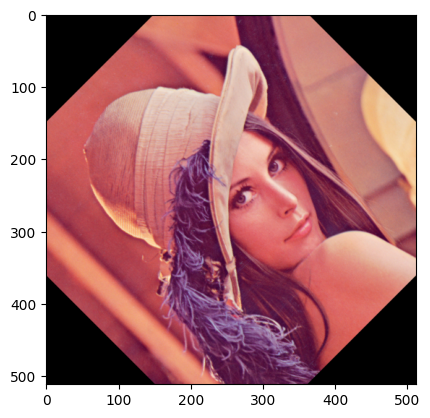

In [68]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

# Mathematical Operations 


## Array Operations 


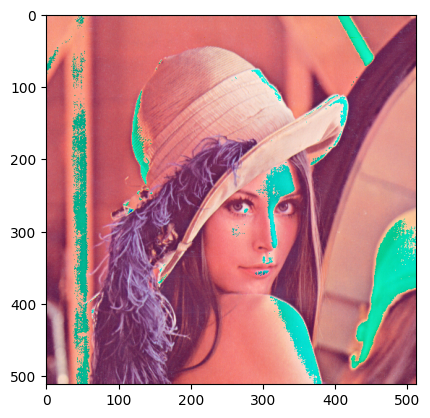

In [69]:
new_image = image + 20

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

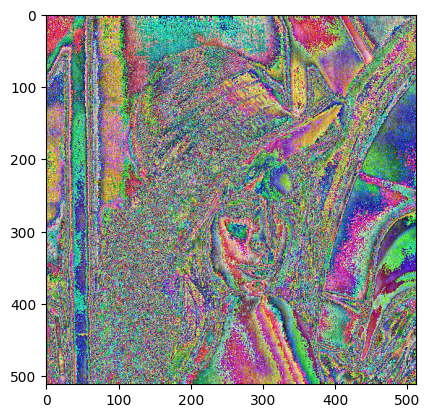

In [27]:
new_image = 10 * image
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

In [72]:
Noise = np.random.normal(0, 20, (rows, cols, 3)).astype(np.uint8) # creating noise layer
Noise.shape


(512, 512, 3)

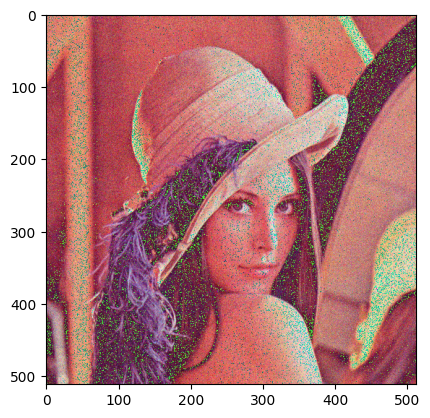

In [73]:
new_image = image + Noise # image + noise

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

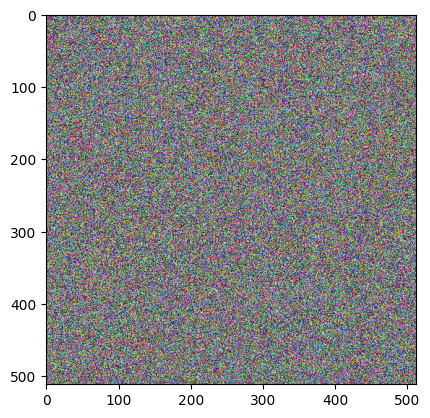

In [74]:
new_image = image * Noise # image multiplied by noise (value of intensity)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

## Matrix Operations 


Grayscale images are matrices. Consider the following grayscale image:


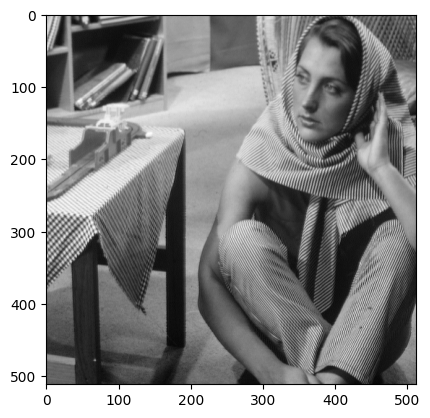

In [31]:
im_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)
im_gray.shape

plt.imshow(im_gray,cmap='gray')
plt.show()

In [75]:
U, s, V = np.linalg.svd(im_gray , full_matrices=True)

In [76]:
s.shape

(512,)

In [77]:
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)


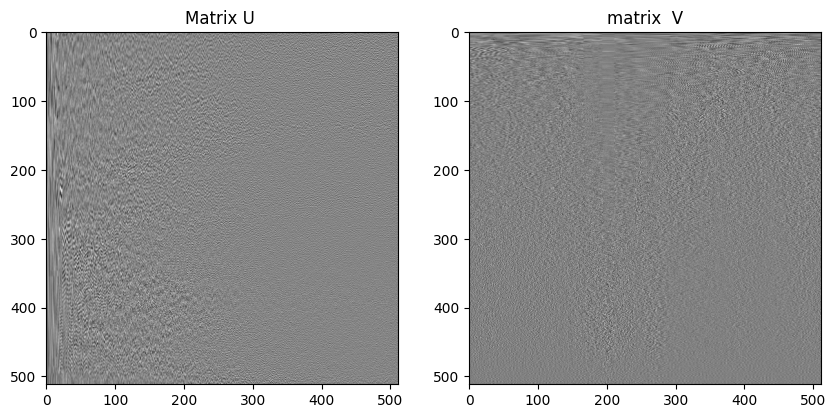

In [78]:
 plot_image(U,V,title_1="Matrix U ",title_2="matrix  V")

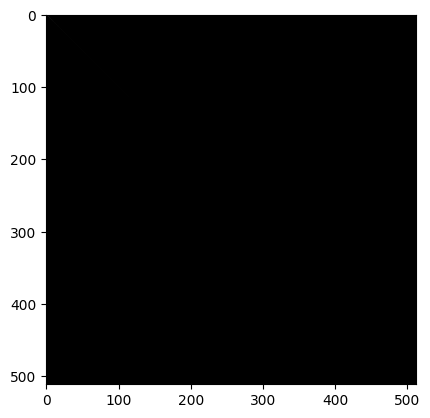

In [79]:
plt.imshow(S,cmap='gray')
plt.show()

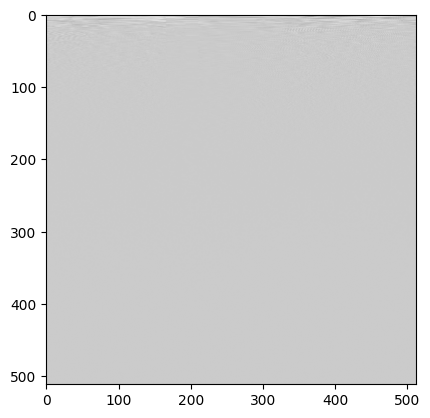

In [80]:
B = S.dot(V)
plt.imshow(B,cmap='gray')
plt.show()

In [81]:
A = U.dot(B)

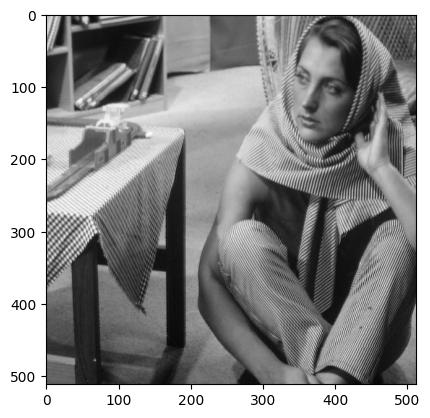

In [82]:
plt.imshow(A,cmap='gray')
plt.show()

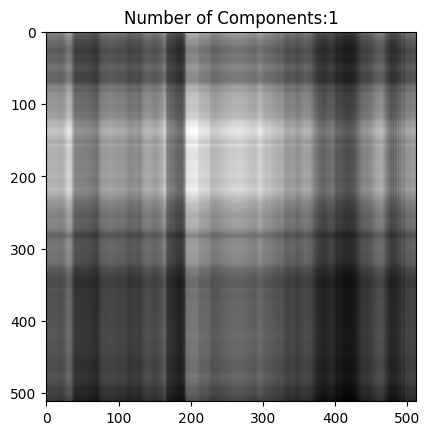

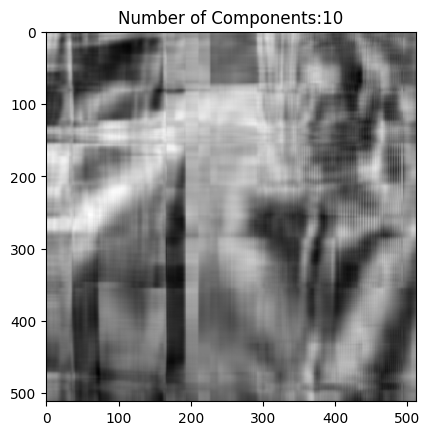

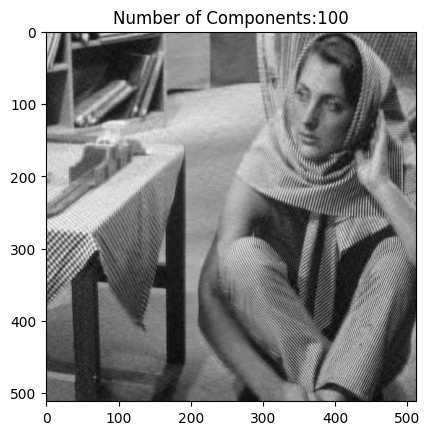

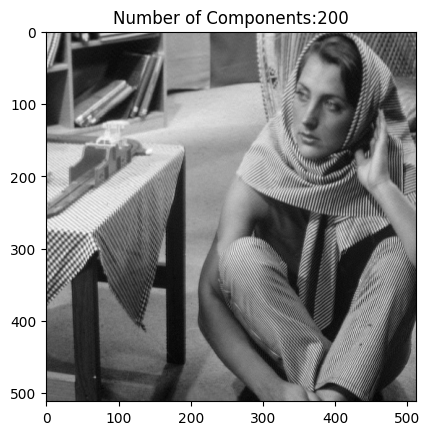

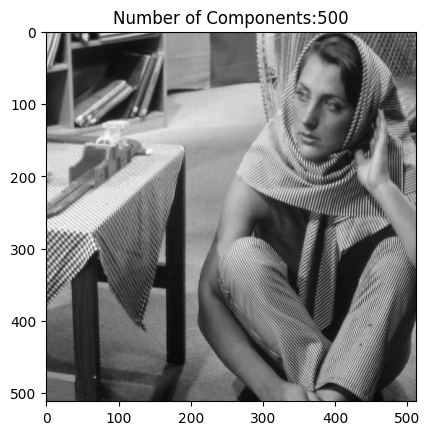

In [83]:
for n_component in [1,10,100,200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A,cmap='gray')
    plt.title("Number of Components:"+str(n_component))
    plt.show()